## **Objective-:**
This assignment focuses on exploring the Algerian forest fire dataset to gain insights into the Fire Weather Index (FWI). The analysis involves:


*  Data preprocessing and cleaning
*  Visualization to understand the data distribution
*  Developing multiple linear regression, polynomial regression, and regularization models
* Cross-validation and hyperparameter tuning to evaluate model performance
* Creating pickle files and testing the model on unseen data











In [138]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [139]:
# Load the  Algerian forest fire dataset
df = pd.read_csv('/content/drive/MyDrive/Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [140]:
# Check Shape and distribution of data
df.shape


(243, 15)

In [141]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [142]:
# Check if data is clean or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [143]:
# Checking for missing values
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [144]:
# Checking for duplicate values
df.duplicated().sum()

0

**DATA-:**
This Dataset have 243 records with 15 features and does not have any duplicate and missing values.In column named Classes there are whitespaces which we need to remove before converting this categorical column to the numerical column.

In [145]:
df.dtypes

,0
day,int64
month,int64
year,int64
Temperature,int64
RH,int64
Ws,int64
Rain,float64
FFMC,float64
DMC,float64
DC,float64


In [146]:
# Checking for the unique values in Classes column
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [147]:
# Removing whitespaces from Classes categories
df['Classes'] = df['Classes'].str.replace(pat=' +', repl='', regex=True)
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [148]:
from sklearn.preprocessing import LabelEncoder

# Converting Classes to numerical column
le = LabelEncoder()
df['Classes'] = le.fit_transform(df['Classes'])

df.head(7)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,0


In [149]:
df['year'].unique()
df.drop('year', axis=1, inplace=True)

In [150]:
df.to_csv('Afs_cleaned.csv', index=False)

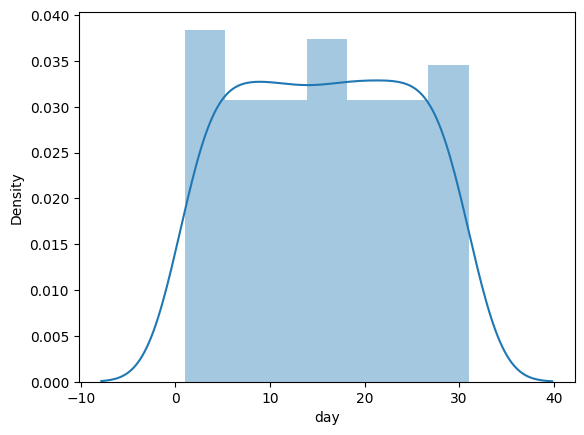

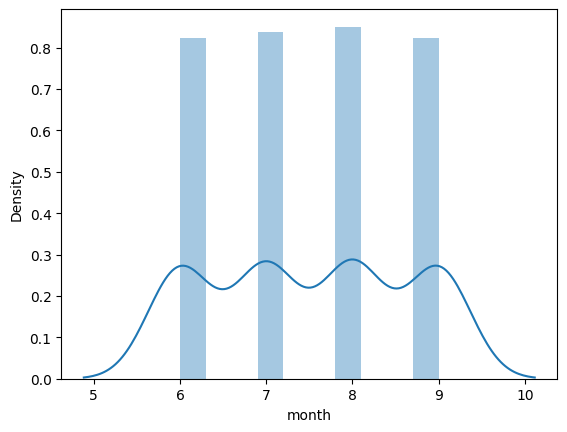

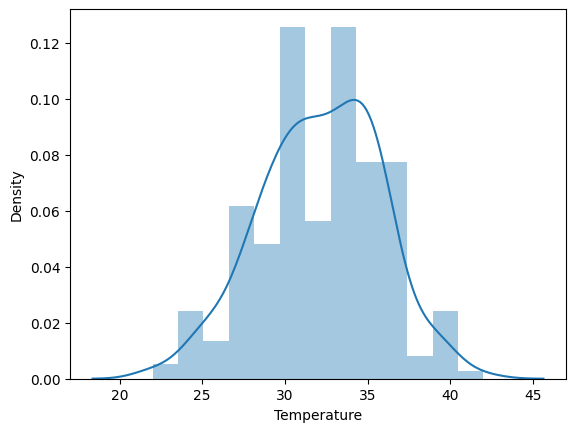

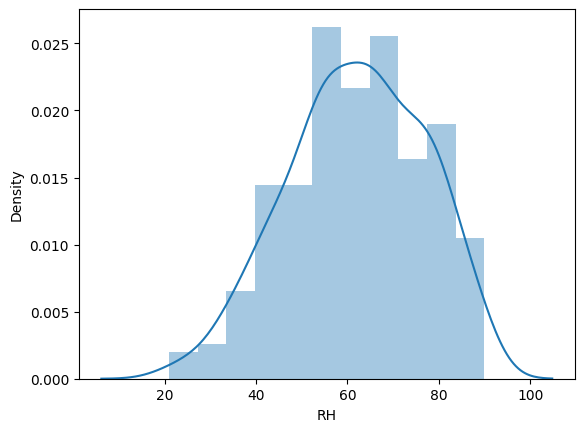

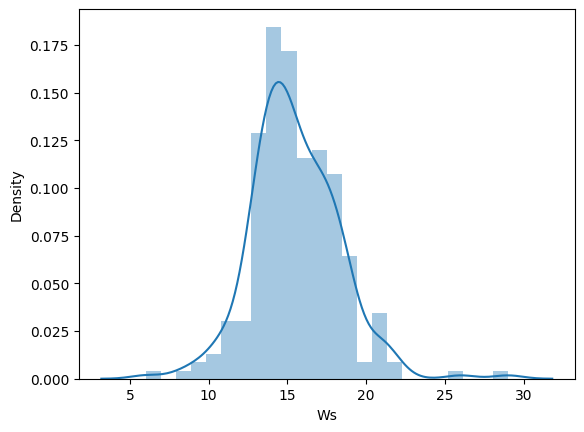

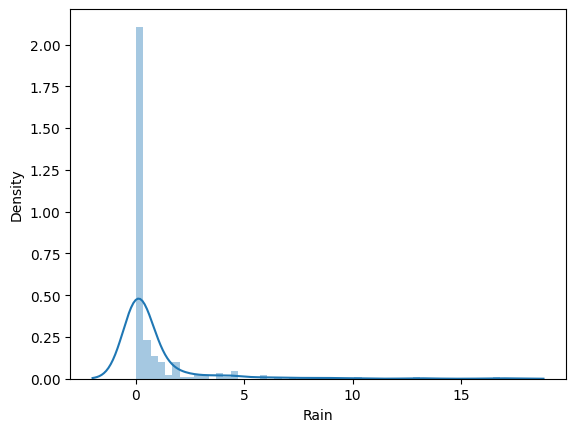

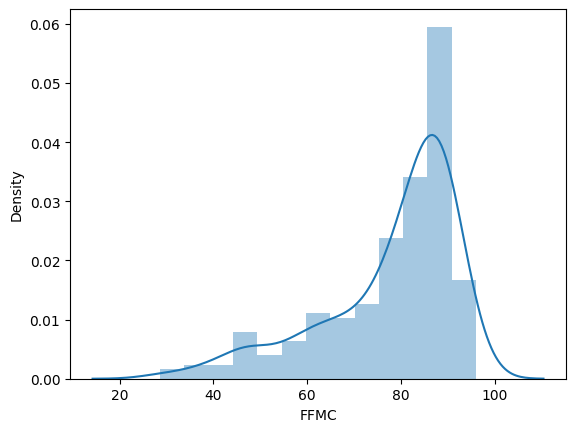

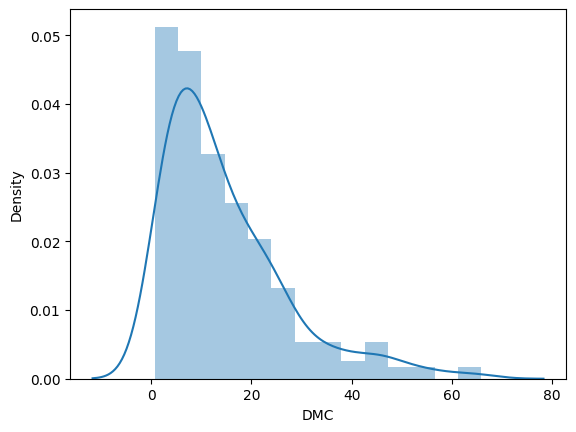

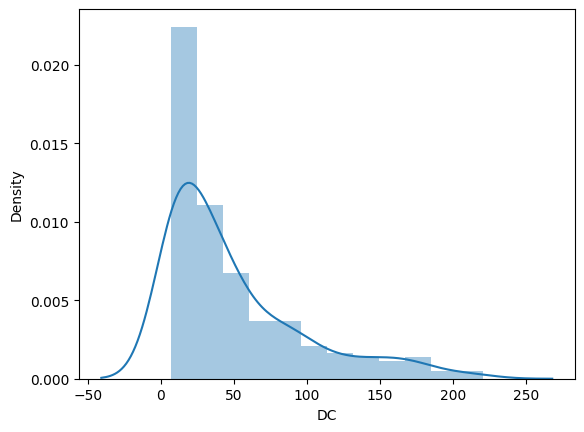

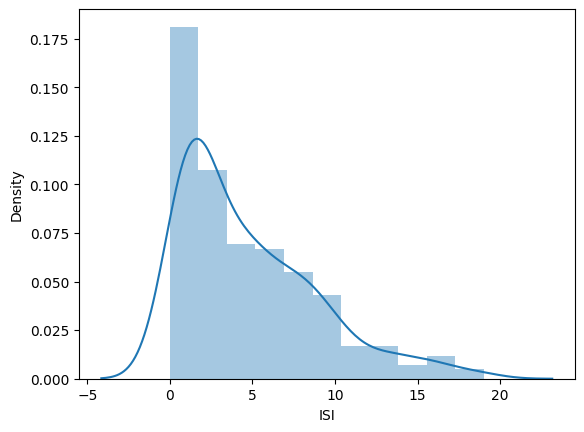

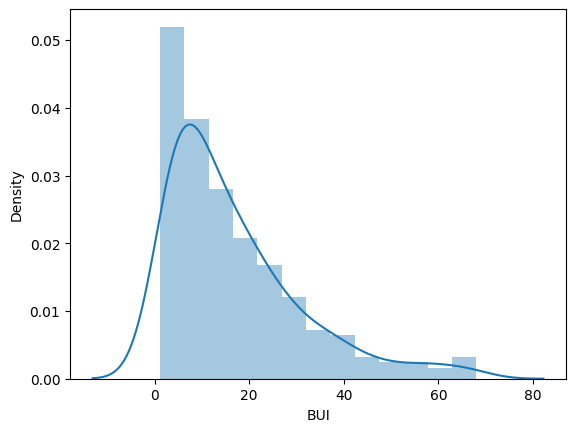

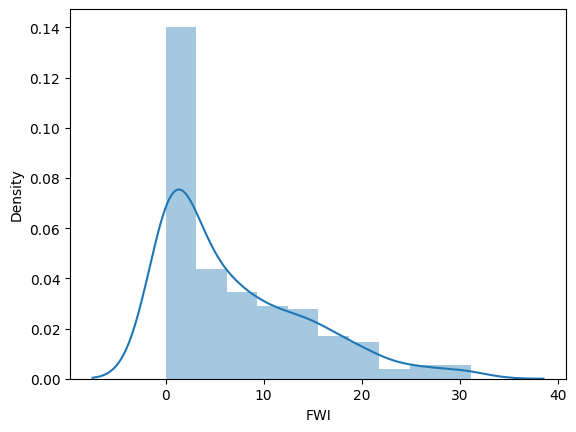

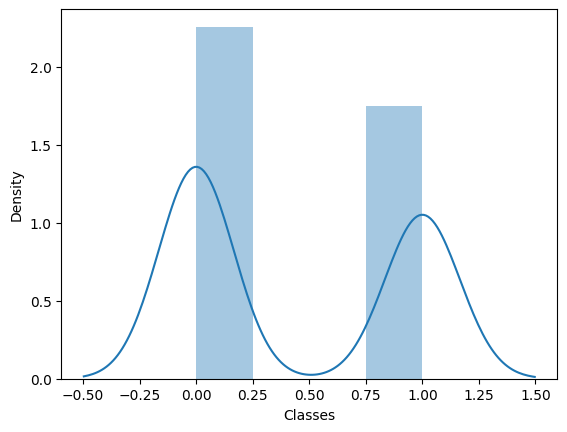

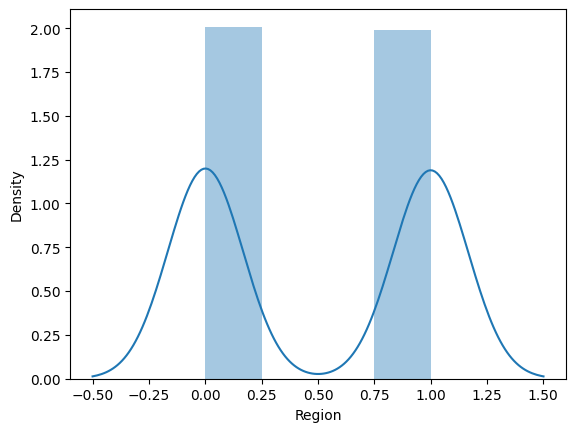

In [151]:
# univariate analysis of features
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

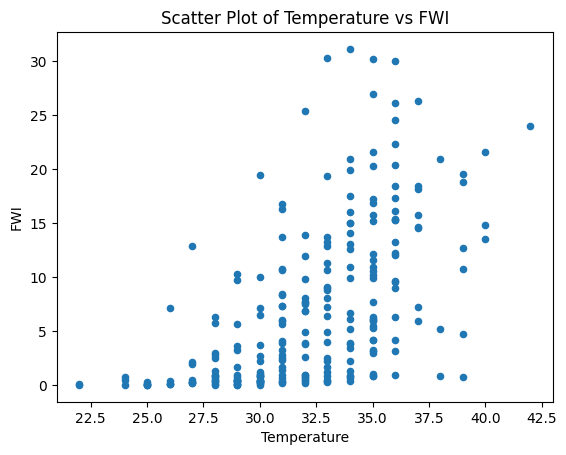

In [35]:
# Bivariate Analysis
# Create a scatter plot of one variable with another
df.plot.scatter(x='Temperature', y='FWI')

# Set the title and labels
plt.title('Scatter Plot of Temperature vs FWI')
plt.xlabel('Temperature')
plt.ylabel('FWI')

# Show the plot
plt.show()

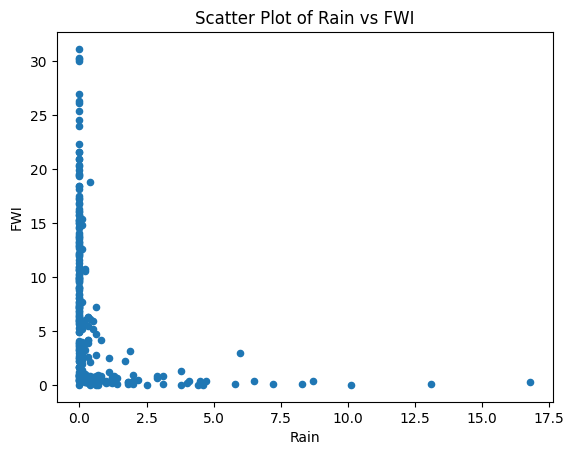

In [36]:
# Create a scatter plot of one variable with another
df.plot.scatter(x='Rain', y='FWI')

# Set the title and labels
plt.title('Scatter Plot of Rain vs FWI')
plt.xlabel('Rain')
plt.ylabel('FWI')

# Show the plot
plt.show()

# **Correlation with FWI:**

**Strong positive correlations:**
1.DMC (Dry Matter Content): The strongest correlation with FWI (0.88),
suggesting that higher DMC values are strongly associated with higher FWI.

2.DC (Duff Coverage): A strong positive correlation (0.74) indicates that higher DC values also contribute to higher FWI.

3.BUI (Buildup Index): Another strong positive correlation (0.86) suggests that BUI is a significant factor in determining FWI.

4.FFMC (Fine Fuel Moisture Code): A moderately strong positive correlation (0.69) suggests that lower FFMC values (indicating drier fuel) are associated with higher FWI.

**Weak or no correlation:**
5.Day, Month, Temperature, RH, Ws, Rain: These variables have weak or no correlation with FWI, suggesting that they may not be as significant factors in determining forest fire intensity.

# **Correlations between Other Variables:**

**Strong positive correlations:**

1.DMC, DC, BUI: These three variables show strong positive correlations with each other, indicating that they are highly interrelated.

2.FFMC and DMC: A strong positive correlation (0.6) suggests that lower FFMC values are associated with higher DMC values.

**Strong negative correlations:**

3.Temperature and RH: A strong negative correlation (-0.65) indicates that higher temperatures are associated with lower relative humidity.
FFMC and RH: A strong negative correlation (-0.64) suggests that lower FFMC values (drier fuel) are associated with lower relative humidity.

4.Other notable correlations:
Rain and FFMC: A negative correlation (-0.54) suggests that higher rainfall is associated with higher FFMC values (more moist fuel).
Temperature and Rain: A weak negative correlation (-0.33) suggests a slight inverse relationship between temperature and rainfall.

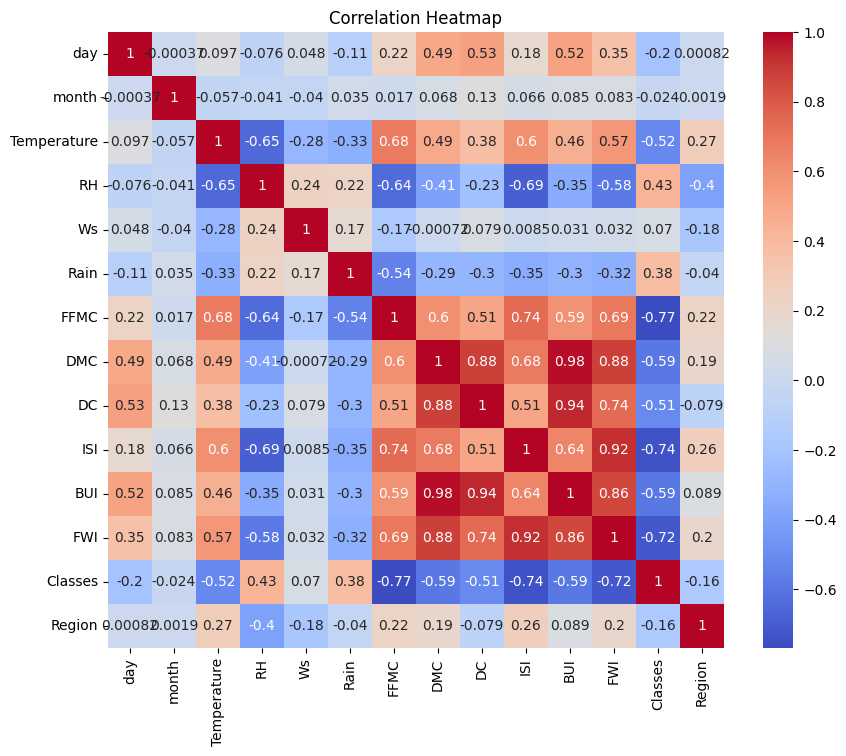

In [23]:
# Heat Map
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [359]:
# splitting the data into independent and Target Variables
X=df.drop(['FWI', 'Ws', 'month'], axis=1)
y=df['FWI']

In [360]:
# Split the data into train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [361]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [362]:
# Data Normalization or scaling for faster convergence and removing larger feature dominance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
print('x_train_scaled', x_train_scaled)
x_test_scaled =scaler.transform(x_test)
print('x_test_scaled', x_test_scaled)

x_train_scaled [[ 0.91502056 -0.87563202  0.21321832 ... -0.76790976  1.14434427
  -1.01036297]
 [ 1.14086533  0.22209084 -1.65484925 ...  3.10086694 -0.8738629
   0.98974332]
 [-1.00465998  1.5942444  -1.25454906 ... -0.24276653 -0.8738629
   0.98974332]
 ...
 [-1.68219429 -1.97335488  0.947102   ... -1.03380506  1.14434427
  -1.01036297]
 [ 1.47963249  0.49652155 -0.18708188 ...  0.14278167 -0.8738629
   0.98974332]
 [-0.55297044 -0.60120131  1.0138187  ... -0.99392076  1.14434427
  -1.01036297]]
x_test_scaled [[ 1.02794295 -0.32677059  0.14650162 -0.38015572  0.61070375 -0.07699537
   0.25303529  0.17532762  0.06301308 -0.8738629  -1.01036297]
 [-1.00465998  0.22209084 -0.52066537 -0.38015572  0.71720269 -0.40637763
  -0.41556406  0.33729694 -0.42889324 -0.8738629  -1.01036297]
 [-1.68219429 -1.15006273 -0.25379858  0.6761624  -1.02228009 -0.91960114
  -0.85728135 -0.86590375 -0.93409432  1.14434427  0.98974332]
 [ 0.46333102  0.49652155 -0.25379858 -0.2841268   0.09950881  0.267706

In [363]:
#Building model
#initating model object
lnr = LinearRegression()


In [364]:
# Fit model
#train model
lnr.fit(x_train_scaled, y_train)

LinearRegression()

In [365]:
# Coeff and Intercept
lnr.coef_, lnr.intercept_

(array([ 0.09822305, -0.01401791, -0.22296388, -0.02502203, -0.91044096,
         0.92517238, -0.28226806,  5.04224366,  3.06654653, -0.31445208,
        -0.17882041]),
 7.420103092783506)

In [366]:
# predicting using Linear regression model
FWI_pred = lnr.predict(x_test_scaled)

In [367]:
FWI_pred.shape

(49,)

In [368]:
# Evaluating models using metrices
mse = mean_squared_error(y_test, FWI_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, FWI_pred)
mae = mean_absolute_error(y_test, FWI_pred)

In [369]:
# Printing Metrices
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 0.2892167298233671
Root Mean Squared Error: 0.5377887408856447
Mean Absolute Error: 0.397671520788621
R-squared Score: 0.9904575456062991


In [370]:
# Building Polynomial regression model
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define a parameter grid to explore different degrees
param_grid = {'polynomialfeatures__degree': range(1, 5)}

In [371]:
# Fit Polynomial regression model
# Perform grid search to find the best degree
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 5)})

In [372]:
# Get the best model
best_model = grid_search.best_estimator_

In [373]:
# Make predictions on the test set
P_FWI_pred = best_model.predict(x_test_scaled)

In [374]:
# Evaluating polynomial Regression model
mse_pnr = mean_squared_error(y_test, P_FWI_pred)
rmse_pnr = np.sqrt(mse)
r2_pnr = r2_score(y_test, P_FWI_pred)
mae_pnr = mean_absolute_error(y_test, P_FWI_pred)


In [375]:
# Printing Metrices
print("Mean Squared Error:", mse_pnr)
print("Root Mean Squared Error:", rmse_pnr)
print("Mean Absolute Error:", mae_pnr)
print("R-squared Score:", r2_pnr)

Mean Squared Error: 5.240228433910526
Root Mean Squared Error: 0.5377887408856447
Mean Absolute Error: 0.5980181402089645
R-squared Score: 0.8271032216092564


In [376]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)

In [377]:
# Train the model on the training data
ridge_model.fit(x_train_scaled, y_train)

Ridge(alpha=0.1)

In [378]:
# Make predictions on the testing data
FWI_pred_ridge = ridge_model.predict(x_test_scaled)

In [379]:
# Evaluating Ridge Regression model
mse_ridge = mean_squared_error(y_test, FWI_pred_ridge)
rmse_ridge = np.sqrt(mse)
r2_ridge = r2_score(y_test, FWI_pred_ridge)
mae_ridge = mean_absolute_error(y_test, FWI_pred_ridge)

In [380]:
# Printing Metrices
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared Score:", r2_ridge)

Mean Squared Error: 0.3299801110283073
Root Mean Squared Error: 0.5377887408856447
Mean Absolute Error: 0.41005884675698284
R-squared Score: 0.9891125933059298


In [381]:
# Perform hyperparameter tuning on the Ridge regression model
param_grid_ridge = {'alpha': [0.1, 0.5,0.3, 1.0]}
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5)
grid_search_ridge.fit(x_train_scaled, y_train)
print(f'Ridge Regression Best Hyperparameters: {grid_search_ridge.best_params_}')
print(f'Ridge Regression Best Score: {grid_search_ridge.best_score_}')


Ridge Regression Best Hyperparameters: {'alpha': 1.0}
Ridge Regression Best Score: 0.9562768162971244


In [382]:
# Creating a Lasso regression model
lasso_model = Lasso(alpha=0.1)

In [383]:
# Fit lasso model
lasso_model.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [384]:
# make predictions using lasso model
FWI_pred_lasso = lasso_model.predict(x_test_scaled)

In [385]:
# Evaluating Lasso Regression model
mse_lasso = mean_squared_error(y_test, FWI_pred_lasso)
rmse_lasso = np.sqrt(mse)
r2_lasso = r2_score(y_test, FWI_pred_lasso)
mae_lasso = mean_absolute_error(y_test, FWI_pred_lasso)

In [386]:
# Printing Metrices
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared Score:", r2_lasso)

Mean Squared Error: 0.537358165120813
Root Mean Squared Error: 0.5377887408856447
Mean Absolute Error: 0.5488163736516999
R-squared Score: 0.9822703348216411


In [387]:
# Perform hyperparameter tuning on the Lasso regression model
param_grid_lasso = {'alpha': [0.1, 0.3, 0.7,0.5, 1.0]}
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5)
grid_search_lasso.fit(x_train_scaled, y_train)
print(f'Lasso Regression Best Hyperparameters: {grid_search_lasso.best_params_}')
print(f'Lasso Regression Best Score: {grid_search_lasso.best_score_}')

Lasso Regression Best Hyperparameters: {'alpha': 0.1}
Lasso Regression Best Score: 0.9562119978802238


In [423]:
# Create an Elastic Net model
en_model = ElasticNet(alpha=0.1, l1_ratio=0.9)



In [424]:
# Train the model on the training data
en_model.fit(x_train_scaled, y_train)



ElasticNet(alpha=0.1, l1_ratio=0.9)

In [425]:
# Make predictions on the testing data
FWI_pred_en = en_model.predict(x_test_scaled)

In [426]:
# Evaluating Elasticnet model
mse_en = mean_squared_error(y_test, FWI_pred_en)
rmse_en = np.sqrt(mse)
r2_en = r2_score(y_test, FWI_pred_en)
mae_en = mean_absolute_error(y_test, FWI_pred_en)

In [427]:
# Printing Metrices
print("Mean Squared Error:", mse_en)
print("Root Mean Squared Error:", rmse_en)
print("Mean Absolute Error:", mae_en)
print("R-squared Score:", r2_en)

Mean Squared Error: 0.6820610366202088
Root Mean Squared Error: 0.5377887408856447
Mean Absolute Error: 0.5953423459187381
R-squared Score: 0.9774959894621459


In [428]:
# Perform hyperparameter tuning on the Elastic Net model
param_grid_en = {'alpha': [0.1,0.2,0.3,0.4, 0.5, 1.0], 'l1_ratio': [0.2,0.3, 0.64, 0.4, 0.5,0.76, 0.85,0.9]}
grid_search_en = GridSearchCV(en_model, param_grid_en, cv=4)
grid_search_en.fit(x_train_scaled, y_train)
print(f'Elastic Net Best Hyperparameters: {grid_search_en.best_params_}')
print(f'Elastic Net Best Score: {grid_search_en.best_score_}')

Elastic Net Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Elastic Net Best Score: 0.9633794295595512


Based on the provided model performance metrics, the Linear Regression model outperforms the others.

Key reasons:

Lowest Mean Squared Error (MSE) of 0.2892
Highest R-squared Score of 0.9905, indicating it explains the most variance in the target variable
Relatively low Mean Absolute Error (MAE) of 0.3977
Similar Root Mean Squared Error (RMSE) to other model

In [429]:
# Save the linear regression  model as a pickle file
with open('lnr_model.pkl', 'wb') as f:
    pickle.dump(lnr, f)